In [1]:
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.image as mpimg
import skimage.data as fixtures
import matplotlib.pyplot as plt
from PIL import Image
from numpy.fft import fft2
from numpy import *


In [2]:
A = np.array(Image.open('trikoupi6_low.png'))## load the image

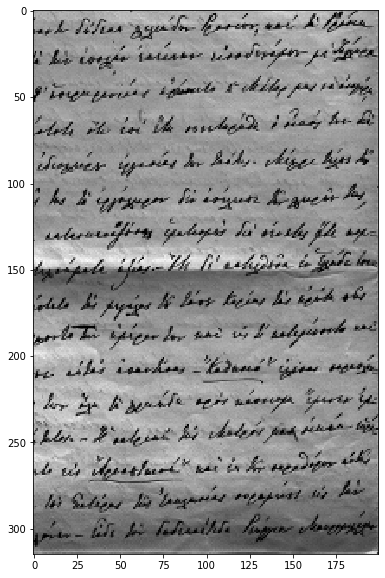

In [3]:
fig = plt.figure(figsize=(10,10))## print the image
plt.imshow(A, cmap='gray')
plt.show()

min,max:  0.0 , 201.0


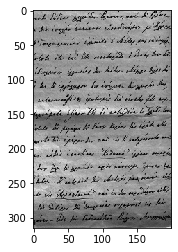

In [4]:
A=double(A)
A_gray = np.zeros((A.shape[0],A.shape[1]))
rows=A.shape[0]
cols=A.shape[1]

##edw elenxw an einai enxrwmh fotografeia
##an einai thn metatrepw se aspromavrh me ton mesw oro twn r,g,b
if len(A.shape)==3:
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            A_gray[i,j]=(A[i,j,0]+A[i,j,1]+A[i,j,2])/3
else:
      A_gray=np.copy(A)
plt.imshow(A_gray, cmap='gray')
min_value=np.min(A_gray)
max_value=np.max(A_gray)
print("min,max: ",min_value,",",max_value )

In [5]:
def katwfliwsh_eikonas(image,thresholds):# threshold,xmin,xmax,ymin,ymax): # threshold image with table with thresholds
    new_image=np.zeros(image.shape)
    #res = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i,j]>=thresholds[i,j]):
                new_image[i,j]=255
            else:
                new_image[i,j]=0
                
    return new_image

In [6]:


def ypologise_antikeimeniki_otsu(image):
    img=image[image>=0] ##TAKE THE >=0 VALUES MEANS WITHIN IMAGE BORDERS
    
    values = []
    mu_synoliko = np.mean(img.flatten())
    
    for k in range(0,256,1) : #####edw mporw na balw bhma sto katwfli px 2 anti  gia 1 gia ligotero xrono(max time 6 secs/size)
        tmhma1 = img[img < k]
        tmhma2 = img[img >=k]
        mu1 = np.mean(tmhma1)
        mu2 = np.mean(tmhma2)
        
        if (np.isnan(mu1) or np.isnan(mu2)) :
           continue
        
        pi1 = len(tmhma1) / (len(tmhma1) + len(tmhma2))
        pi2 = len(tmhma2) / (len(tmhma1) + len(tmhma2))
        res = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
        values.append(res)
        
    return values.index(max(values))


In [7]:
def find_neighbourhood(img,x,y,window_size): ## find the neighbourhood(square with x,y in the middle) 
                                                ## for x,y point in img with window size 
    
    new_img=np.zeros((window_size,window_size))
    
    if window_size%2==0:## window size gia artio
        meso=window_size/2
        begin_i=x-meso
        end_i=x+meso ## find the borders of neighbourhood gia artio window size
        begin_j=y-meso
        end_j=y+meso
    else:## window size gia peritto
        meso=math.floor(window_size/2)
        begin_i=x-meso
        end_i=x+meso+1## find the borders of neighbourhood gia peritto window size
        begin_j=y-meso
        end_j=y+meso+1
    
    begin_i=int(begin_i)
    end_i=int(end_i)
    begin_j=int(begin_j)
    end_j=int(end_j)
    sumi=0
    for i in range(begin_i,end_i):
        for j in range(begin_j,end_j):
            
            if(i>=0 and i<img.shape[0] and j>=0 and j<img.shape[1]):# check if pixel is within image's borders
                
                new_img[i-begin_i,j-begin_j]=img[i,j]
                
                    
            else: ##if is out set -1
                new_img[i-begin_i,j-begin_j]=-1
     
   
        
    return new_img ## neighbourhood
        
    

In [8]:
def otsu_thresholder(image,window_size):
    kalytero_katwfli = 0
    kalyterh_timi = 0
    katwflia=np.zeros(image.shape)
    new_image=np.zeros(image.shape)
    for row in range(rows):
        for col in range(cols):## for every pixel in image
            
            A_i=find_neighbourhood(image,row,col,window_size) # find  neighbourhood
            kalytero_katwfli = ypologise_antikeimeniki_otsu(A_i) # take the best threshold
            katwflia[row,col]=kalytero_katwfli
            
            if(image[row,col]>=kalytero_katwfli):## creating the new image thresholding the image 
                new_image[row,col]=255
            else:
                new_image[row,col]=0
           
    return (np.uint8(new_image))




window size:  4


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


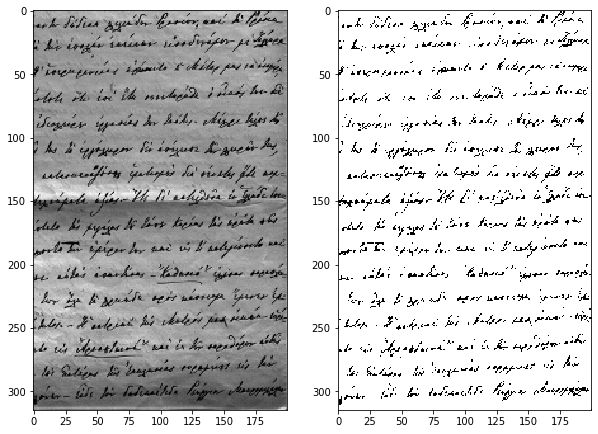

window size:  6


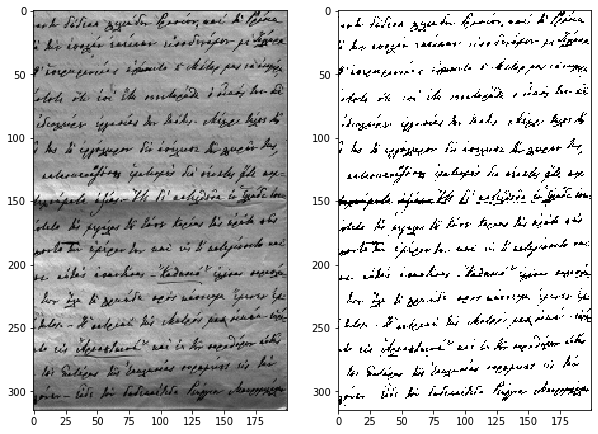

window size:  8


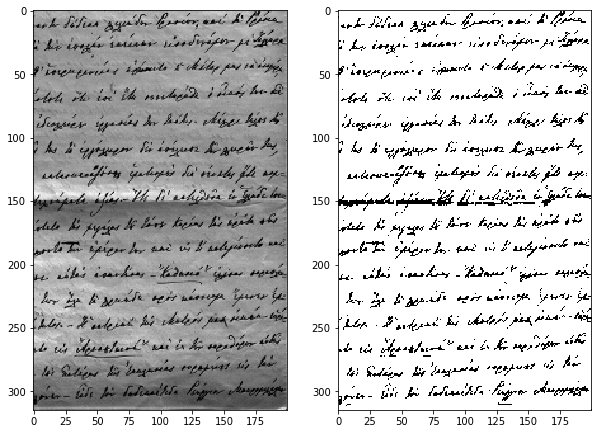

window size:  11


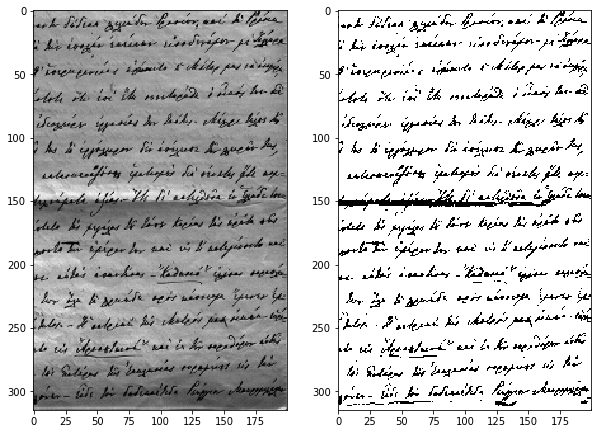

window size:  15


In [ ]:
window_size=[4,5,7,11,15]
A_g=np.copy(A_gray)
for size in window_size:
    print("window size: ",size)
    A_otsu = otsu_thresholder(A_gray,size)
    fig = plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(A_g, cmap='gray')## print original photo
    plt.subplot(1, 2, 2)
    plt.imshow(A_otsu, cmap='gray')##print new photo
    plt.show()